In [1]:
from glob import glob 
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

demonstratives = ['this','that','one','those','these','there','here']


In [3]:

def find_demonstrative_index(expression, demonstratives):
    words = expression.split(' ')
    # Iterate over each word to find if it matches any of the demonstratives
    for i, word in enumerate(words):
        if word in demonstratives:
            return i  # Return the index of the first matching demonstrative
    return -1  # Return -1 if no demonstratives are found
demonstratives = ['this','that','one','those','these','there','here']


In [4]:
L = np.load('./wav_synth_lengths.npy',allow_pickle=True)
synth_length = {}
for thing in L:
    item = list(thing.keys())[0].split('/')[-1]
    item = item.replace('.mp3','')
    synth_length[item] = list(thing.values())[0]

synth_length

{'dem_md_74_0': 1.436734693877551,
 'rugby_6_19': 4.6236734693877555,
 'day_1_1_15_0': 4.963265306122449,
 'setc_6_12': 5.851428571428571,
 'setc_5_17': 4.179591836734694,
 'setb_1_5': 2.115918367346939,
 'travel_3_18': 2.115918367346939,
 'dem_md_1_0': 1.253877551020408,
 'dem_md_back_13_0': 2.5338775510204083,
 'dem_md_36_0': 1.28,
 'setb_3_5': 2.220408163265306,
 'setc_6_15': 5.98204081632653,
 'ctx_fs_29_2': 5.015510204081632,
 'ctx_fs_17_2': 4.12734693877551,
 'ctx_fs_76_0': 5.381224489795918,
 'rugby_1_6': 2.089795918367347,
 'day_1_3_19_0': 7.288163265306123,
 'setb_5_17': 5.328979591836735,
 'dem_md_14_0': 1.1493877551020408,
 'travel_1_8': 1.3844897959183673,
 'ctx_fs_40_0': 4.963265306122449,
 'dem_md_96_0': 1.906938775510204,
 'ctx_fs_44_0': 5.198367346938776,
 'rugby_3_0': 1.933061224489796,
 'ctx_fs_12_2': 4.022857142857143,
 'ctx_md_7_0': 5.69469387755102,
 'ctx_fs_s_49_0': 3.1085714285714285,
 'setc_5_7': 3.8922448979591837,
 'travel_2_5': 4.25795918367347,
 'ctx_fs_s_3_

In [6]:

L = np.load('./bvh_pt_lengths.npy',allow_pickle=True)
framerate = 120
point_length = {}
for thing in L:
    item = list(thing.keys())[0].split('/')[-1]
    item = item.replace('.bvh','')
    point_length[item] = list(thing.values())[0]/framerate

point_length
print(len(point_length))

1162


{'st1.21493_22115_1.31stretch': 6.808333333333334, 'st2.6483_7030_1.33stretch': 6.083333333333333, 'st2_mirrored.7431_7795': 3.033333333333333, 'st1_mirrored.3015_3401': 3.216666666666667, 'st1.14295_14860': 4.708333333333333, 'st2.6146_6478_0.9stretch': 2.4833333333333334, 'st1_mirrored.17235_17589_1.26stretch': 3.725, 'st1_mirrored.45958_46512_1.0stretch': 4.625, 'st1.39261_40719': 12.15, 'st1_mirrored.45687_45953': 2.216666666666667, 'st1.15138_15625': 4.058333333333334, 'st2_mirrored.1815_2311_0.99stretch': 4.1, 'st2.9879_10507_1.23stretch': 6.433333333333334, 'st1.16330_16795_0.92stretch': 3.558333333333333, 'st1_mirrored.25173_25609_0.98stretch': 3.575, 'st1_mirrored.19997_20370_1.01stretch': 3.15, 'st1_mirrored.42513_43129_0.93stretch': 4.791666666666667, 'st1_mirrored.17976_18360_1.23stretch': 3.933333333333333, 'st1.45132_45682_1.16stretch': 5.325, 'st2.8293_8847_0.94stretch': 4.341666666666667, 'st1.7376_7753_0.82stretch': 2.575, 'st1_mirrored.20375_20767_1.32stretch': 4.325,

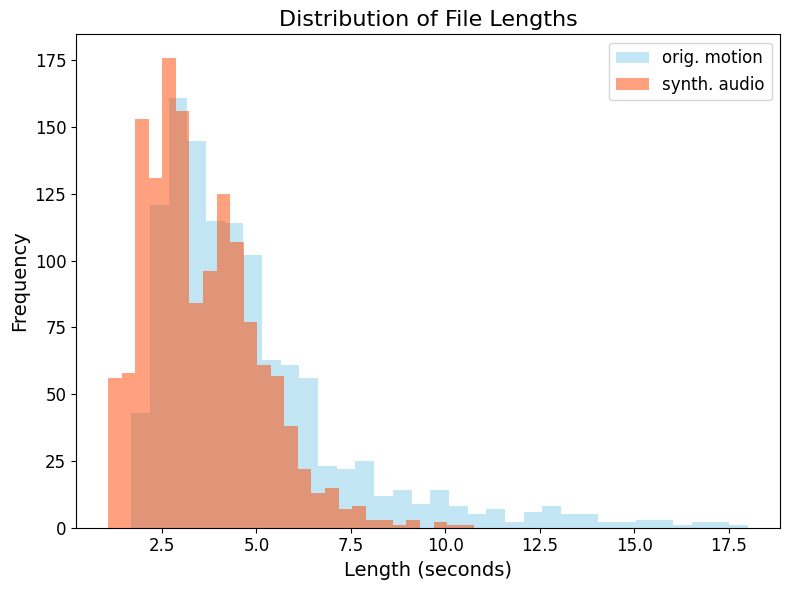

In [103]:
def plot_histogram(data1,data2,title,fname):
    """
    Creates a histogram from the given data and formats it for an ACM paper.
    
    Parameters:
        data (dict): A dictionary with keys as identifiers and values as lengths.
    """
    # Extract lengths from the dictionary
    lengths1 = data1['Length'].values
    lengths2 = data2['Length'].values

    # Set up the plot with ACM paper guidelines in mind
    plt.figure(figsize=(8, 6))
    plt.hist(lengths1, bins='auto', color='skyblue',alpha = 0.5,label ='orig. motion')
    plt.hist(lengths2, bins='auto', color='orangered',alpha = 0.5,label = 'synth. audio')
    # plt.hist(lengths1, bins='auto', color='skyblue', edgecolor='black',alpha = 0.5)

    # Labels and title
    plt.xlabel('Length (seconds)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(title, fontsize=16)
    
    # Tick parameters
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Layout adjustments
    plt.tight_layout()
    
    plt.legend(fontsize=12)
    # Save the plot as a high-resolution PNG for inclusion in an ACM paper
    plt.savefig(fname, dpi=300)

    
    # Optionally display the plot
    # plt.show()
print(point_length)
data_tuples = [(k,v) for k,v in point_length.items()]
df = pd.DataFrame(data_tuples, columns=['File Path', 'Length'])
df['Length'] = df['Length'].astype(float)
data_tuples = [(k,v) for k,v in synth_length.items()]
df2 = pd.DataFrame(data_tuples, columns=['File Path', 'Length'])
plot_histogram(df,df2,'Distribution of File Lengths','./histogram_len.pdf')
# # print(synth_length)
# data_tuples = [(k,v) for k,v in synth_length.items()]
# df = pd.DataFrame(data_tuples, columns=['File Path', 'Length'])
# plot_histogram(df,'Distribution of Audio File Lengths','./histogram_len_synth.pdf')

In [106]:
files = glob('/data/sgs24/raw/tsv_synth_segments/*.tsv')
print(len(files))
words_to_exclude = ['left', 'right', 'middle', 'back']
files = [f for f in files if not any(word in f for word in words_to_exclude)]
print(len(files))
synth_times = []
synth_names = []
synth_data = {}
synth_pre = {}
synth_post = {}
for fn in files:
    temp_list = []
    item = fn.split('/')[-1].split('.tsv')[0]
    with open(fn) as f:
        with open(fn) as f:
            for line in f:
                t0, t1, wrd = line.strip().split('\t')
                t0, t1 = float(t0), float(t1)
                temp_list.append([t0, t1, wrd])
        df = pd.DataFrame(temp_list, columns=['t0','t1','wrd'])
        expr = ' '.join(df['wrd'])
        index  = find_demonstrative_index(expr, demonstratives)
        dem_time = df['t0'].iloc[index]
        if dem_time>5:
            continue
        total_time = synth_length[item]
        synth_times.append((total_time, dem_time))
        synth_pre[item] = dem_time
        synth_post[item] = df['t1'].iloc[index] - synth_pre[item]
        synth_data[item] = (dem_time,total_time)
        

print(len(synth_times))

1452
1322
1271


In [107]:
files = glob('/data/sgs24/raw/tsv_pt_segments/*.tsv')
print(len(files))
words_to_exclude = ['left', 'right', 'middle', 'back']
files = [f for f in files if not any(word in f for word in words_to_exclude)]
pt_times = []
pt_names = []
pt_pre = {}
pt_post = {}
pt_data = {}
for fn in files:
    temp_list = []
    item = fn.split('/')[-1].split('.tsv')[0]
    with open(fn) as f:
        with open(fn) as f:
            for line in f:
                t0, t1, wrd = line.strip().split('\t')
                t0, t1 = float(t0), float(t1)
                temp_list.append([t0, t1, wrd])
        df = pd.DataFrame(temp_list, columns=['t0','t1','wrd'])
        expr = ' '.join(df['wrd'])
        index  = find_demonstrative_index(expr, demonstratives)
        dem_time = df['t0'].iloc[index]
        total_time = point_length[item]
        pt_times.append((total_time, dem_time))
        pt_names.append(item)
        pt_pre[item] = dem_time
        pt_post[item] = point_length[item] - pt_pre[item]
        pt_data[item] = (dem_time,total_time)

1147


In [8]:
[s[0] for s in synth_times]

[3.7877551020408164,
 2.5338775510204083,
 5.433469387755102,
 1.3844897959183673,
 2.455510204081633,
 4.179591836734694,
 2.0375510204081633,
 2.403265306122449,
 3.8922448979591837,
 2.5338775510204083,
 2.5861224489795918,
 3.186938775510204,
 2.7689795918367346,
 2.3510204081632655,
 1.3322448979591837,
 1.3844897959183673,
 2.089795918367347,
 6.034285714285715,
 1.8024489795918368,
 5.616326530612245,
 3.0040816326530613,
 5.198367346938776,
 4.41469387755102,
 4.12734693877551,
 3.1608163265306124,
 4.25795918367347,
 4.728163265306122,
 5.746938775510204,
 3.0563265306122447,
 1.2016326530612245,
 3.709387755102041,
 5.433469387755102,
 1.933061224489796,
 5.929795918367347,
 2.089795918367347,
 3.0563265306122447,
 2.8212244897959184,
 1.8546938775510204,
 4.0751020408163265,
 1.2016326530612245,
 2.5338775510204083,
 2.8212244897959184,
 5.433469387755102,
 3.657142857142857,
 2.115918367346939,
 4.362448979591837,
 5.433469387755102,
 1.2016326530612245,
 3.239183673469388,

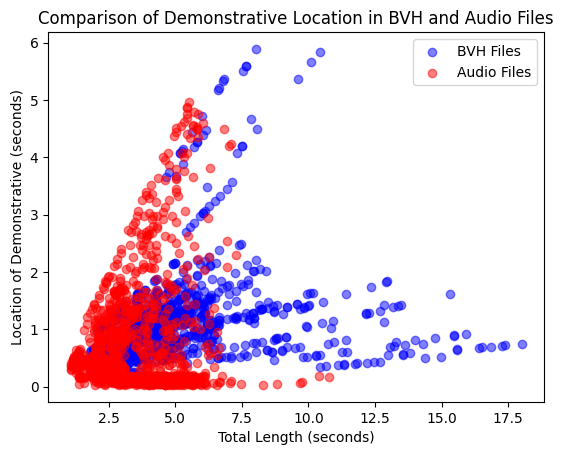

In [10]:
import matplotlib.pyplot as plt

# Let's assume you have two lists of tuples containing (total_length, index_time)
# One for BVH files and one for audio files, where each tuple corresponds to a matched pair.
bvh_data = pt_times  # replace with your actual data
audio_data = synth_times# replace with your actual data
# audio_data = [(x[0],x[1]+0.5) for x in audio_data]

# Unzip the tuples to get separate lists for total length and index time for each dataset
bvh_lengths, bvh_indices = zip(*bvh_data)
audio_lengths, audio_indices = zip(*audio_data)

# Create a scatter plot
plt.scatter(bvh_lengths, bvh_indices, alpha=0.5, color='blue', label='BVH Files')
plt.scatter(audio_lengths, audio_indices, alpha=0.5, color='red', label='Audio Files')

# Add labels and legend
plt.xlabel('Total Length (seconds)')
plt.ylabel('Location of Demonstrative (seconds)')

plt.title('Comparison of Demonstrative Location in BVH and Audio Files')
plt.legend()

# Show the plot
plt.show()


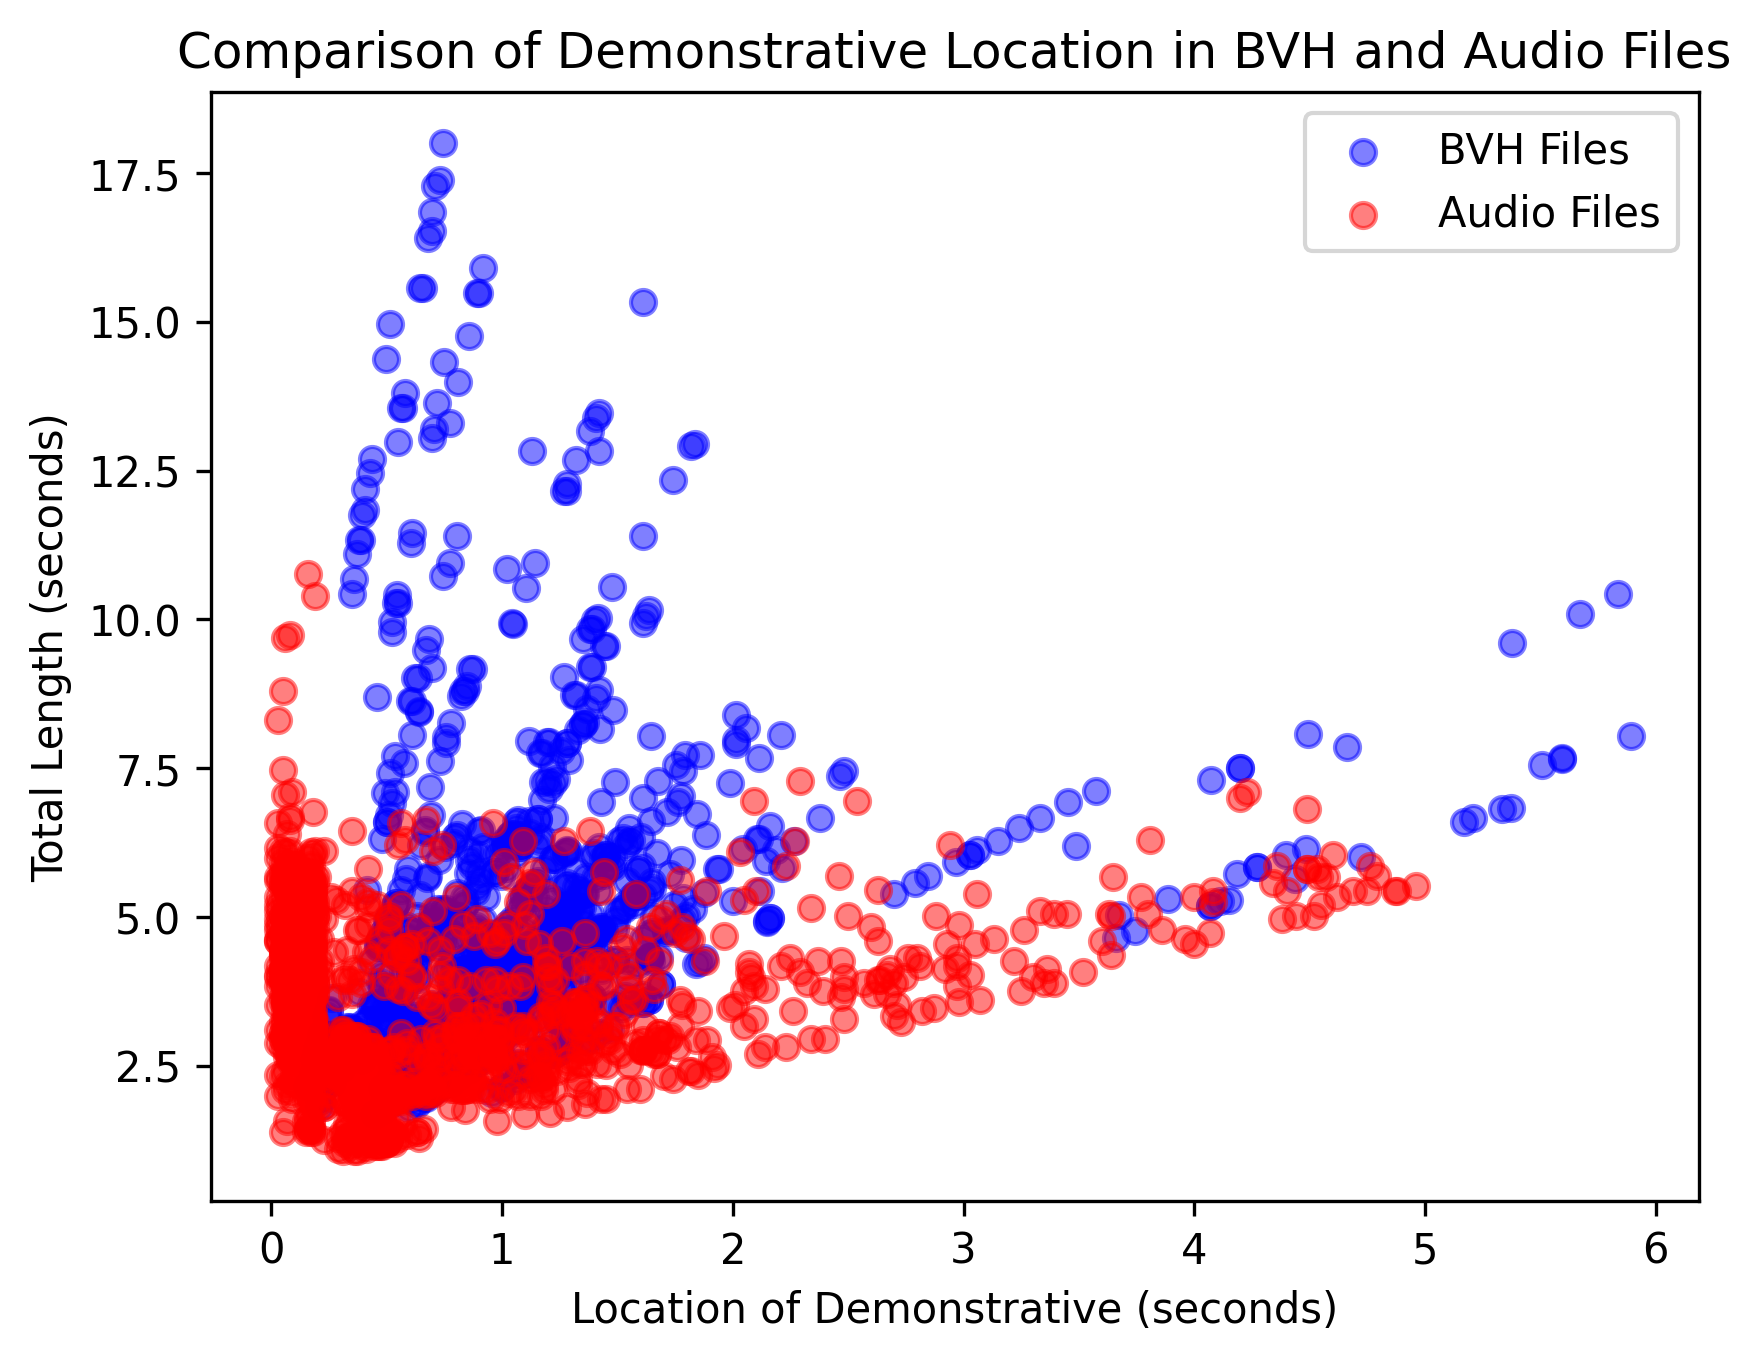

In [11]:
import matplotlib.pyplot as plt

# Let's assume you have two lists of tuples containing (total_length, index_time)
# One for BVH files and one for audio files, where each tuple corresponds to a matched pair.
bvh_data = pt_times  # replace with your actual data
audio_data = synth_times# replace with your actual data
# audio_data = [(x[0],x[1]+0.5) for x in audio_data]

# Unzip the tuples to get separate lists for total length and index time for each dataset
bvh_lengths, bvh_indices = zip(*bvh_data)
audio_lengths, audio_indices = zip(*audio_data)

# Create a scatter plot
plt.figure(dpi=300)  # Set a high dpi for clearer output

plt.scatter(bvh_indices,bvh_lengths, alpha=0.5, color='blue', label='BVH Files')
plt.scatter(audio_indices,audio_lengths, alpha=0.5, color='red', label='Audio Files')

# Add labels and legend
plt.ylabel('Total Length (seconds)')
plt.xlabel('Location of Demonstrative (seconds)')

plt.title('Comparison of Demonstrative Location in BVH and Audio Files')
plt.legend()

plt.savefig('./paper/timing_comparison.pdf', format='pdf', dpi=300)


# Show the plot
plt.show()


In [40]:
pt_times

[(6.658333333333333, 1.2231999999999998),
 (5.133333333333334, 0.72),
 (4.058333333333334, 0.6),
 (2.533333333333333, 0.8424),
 (3.7083333333333335, 1.218),
 (6.083333333333333, 1.2768),
 (2.158333333333333, 0.6438),
 (3.033333333333333, 0.94),
 (2.408333333333333, 0.28080000000000005),
 (3.816666666666667, 1.0488),
 (3.1166666666666667, 0.5722999999999999),
 (6.283333333333333, 1.0138),
 (3.875, 1.69),
 (4.808333333333334, 1.1864999999999999),
 (3.5083333333333333, 0.7315999999999999),
 (12.35, 1.7388),
 (6.441666666666666, 0.8999999999999999),
 (2.3666666666666667, 0.6552),
 (5.833333333333333, 1.48),
 (5.133333333333334, 1.53),
 (3.0, 0.9309999999999999),
 (2.783333333333333, 0.7276000000000001),
 (7.266666666666667, 1.1776),
 (4.05, 0.7936),
 (2.683333333333333, 0.32899999999999996),
 (4.475, 0.66),
 (5.4, 1.8774),
 (6.183333333333334, 1.4224),
 (5.8, 1.94),
 (5.633333333333334, 0.5856),
 (3.75, 0.87),
 (3.3833333333333333, 0.9117999999999999),
 (3.0833333333333335, 0.9493999999999

1271
1147


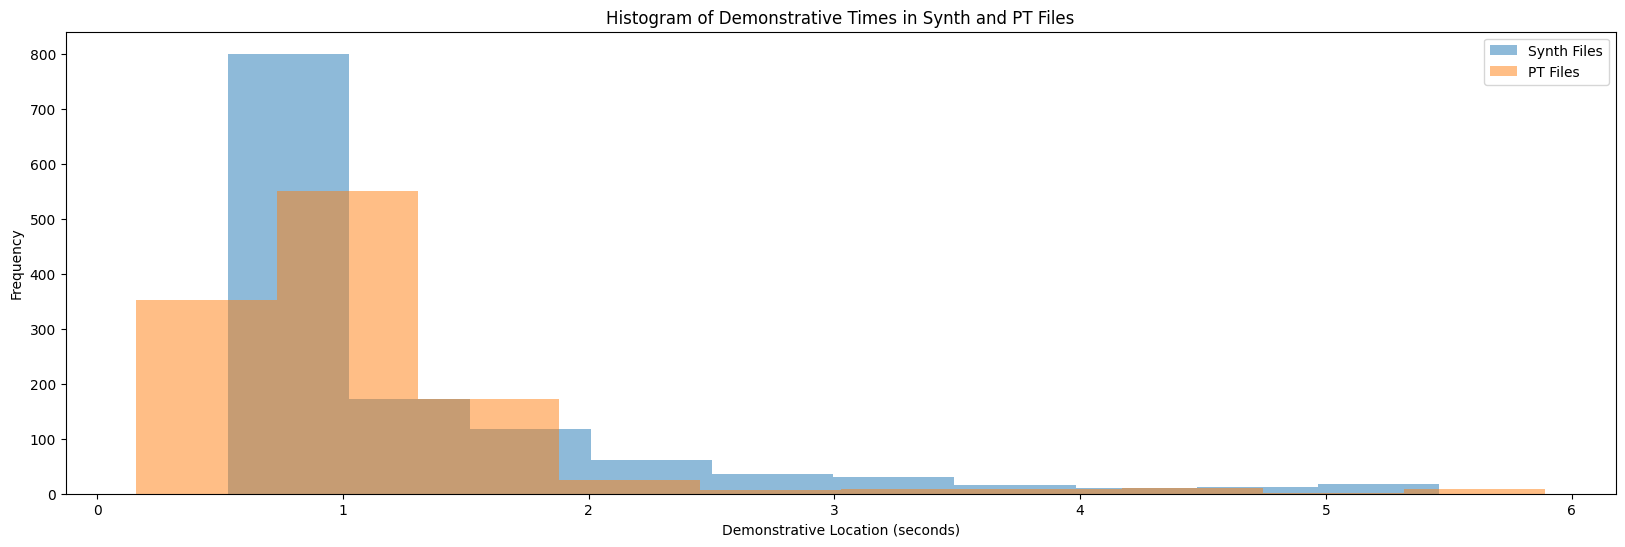

In [17]:
print(len(synth_times))
print(len(pt_times))
synth_times

import matplotlib.pyplot as plt



# Histogram
plt.figure(figsize=(20, 6))
dem_synth = [x[1]+0.5 for x in synth_times]
dem_pt = [x[1] for x in pt_times]
plt.hist(dem_synth, bins=10, alpha=0.5, label='Synth Files')
plt.hist(dem_pt, bins=10, alpha=0.5, label='PT Files')
plt.xlabel('Demonstrative Location (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Demonstrative Times in Synth and PT Files')
plt.legend(loc='upper right')
plt.show()


In [112]:
# Convert the list to a numpy array for statistical calculations
synth_lengths_array = np.array([x[0] for x in synth_times])
print(synth_lengths_array)
lengths_array = np.array(synth_lengths_array)

lengths_array_pt = np.array([x[0] for x in pt_times])
# Calculate the mean and standard deviation
mean_length = np.mean(lengths_array)
std_dev_length = np.std(lengths_array)

# Calculate the 50th (median) and 75th percentiles
median_length_syn = np.percentile(lengths_array, 50)
percentile_75_length = np.percentile(lengths_array, 75)
percentile_75_length

cutoff_time_syn = median_length_syn

median_length_pt = np.percentile(lengths_array_pt, 50)
percentile_75_length = np.percentile(lengths_array, 75)
percentile_75_length

cutoff_time_pt = median_length_pt

print(len(pt_data))
print(len(synth_data))

short_pt = {k:v for k,v in pt_data.items() if v[1]<cutoff_time_pt}
short_synth = {k:v for k,v in synth_data.items() if v[1]<cutoff_time_syn}
long_pt = {k:v for k,v in pt_data.items() if v[1]>=cutoff_time_pt}
long_synth = {k:v for k,v in synth_data.items() if v[1]>=cutoff_time_syn}

synth_pre_short = {k:v for k,v in synth_pre.items() if k in short_synth}
synth_post_short = {k:v for k,v in synth_post.items() if k in short_synth}
pt_pre_short = {k:v for k,v in pt_pre.items() if k in short_pt}
pt_post_short = {k:v for k,v in pt_post.items() if k in short_pt}



[3.7877551  2.53387755 5.43346939 ... 2.08979592 5.38122449 2.58612245]
1147
1271


In [113]:
# make distance matrix
D = []
synth_pre = synth_pre_short
synth_post = synth_post_short
pt_pre = pt_pre_short
pt_post = pt_post_short

for syntitem in list(synth_pre.keys())[:]:
    row = []
    for pointitem in list(pt_pre.keys())[:]:
        syntpre = synth_pre[syntitem]
        syntpost = synth_post[syntitem]
        pointpre = pt_pre[pointitem]
        pointpost = pt_post[pointitem]

        cost = abs(syntpre-pointpre) + abs(syntpost-pointpost)
        if synth_length[syntitem] > point_length[pointitem]:
            cost *= 10
        # penalize if synt starts before or ends after point
        if syntpre > pointpre:
            cost *= 2
        if syntpost > pointpost:
            cost *= 2
        row.append(cost)
    
    D.append(row)
dd = np.array(D)
dd.shape

(631, 573)

In [114]:
from munkres import Munkres
m = Munkres()
assignment_re = m.compute(D)
f = open('assignment_short.csv','w')
f.write('syntitem,pointitem,offset\n')
for pair in assignment_re:
    syntidx,pointidx = pair
    syntitem = list(synth_pre.keys())[syntidx]
    pointitem = list(pt_pre.keys())[pointidx]
    f.write('{},{},{}\n'.format(syntitem, pointitem, pt_pre[pointitem]-synth_pre[syntitem]))
f.close()

In [15]:
# make distance matrix
D = []
for syntitem in list(synth_pre.keys())[:]:
    row = []
    for pointitem in list(pt_pre.keys())[:]:
        syntpre = synth_pre[syntitem]
        syntpost = synth_post[syntitem]
        pointpre = pt_pre[pointitem]
        pointpost = pt_post[pointitem]

        cost = abs(syntpre-pointpre) + abs(syntpost-pointpost)

        # penalize if synt starts before or ends after point
        if syntpre > pointpre:
            cost *= 10
        if syntpost > pointpost:
            cost *= 10
        row.append(cost)
    
    D.append(row)
dd = np.array(D)
dd.shape

(1271, 1147)

In [132]:
assignment = pd.read_csv('./assignment_short.csv')
assignment
# np.mean(assignment.offset.values)
i=0
for row in assignment.iterrows():
    syn = synth_data[row[1].syntitem]
    pt = pt_data[row[1].pointitem]
    print(syn,pt)
    syn[0]
    # print(row[1].offset)
    # print(syn[1],pt[1])
    # slen = syn[1]
    # plen = pt[1]
    # print(slen,plen)
    # print(syn,pt)

(0.44, 2.5338775510204083) (0.777, 2.591666666666667)
(0.44, 1.3844897959183673) (0.5428, 2.966666666666667)
(1.2, 2.455510204081633) (1.2054, 3.8583333333333334)
(0.71, 2.0375510204081633) (0.8099000000000001, 2.9)
(0.17, 2.403265306122449) (0.2626, 2.433333333333333)
(0.34, 2.5338775510204083) (0.5246, 2.55)
(0.31, 2.5861224489795918) (0.9702, 3.55)
(0.18, 3.186938775510204) (0.7138, 3.3833333333333333)
(0.34, 2.7689795918367346) (1.017, 3.558333333333333)
(0.72, 2.3510204081632655) (0.798, 2.9166666666666665)
(0.35, 1.3322448979591837) (0.5848, 2.2333333333333334)
(0.05, 1.3844897959183673) (0.774, 2.2083333333333335)
(0.84, 2.089795918367347) (0.9309999999999999, 3.0)
(0.42, 1.8024489795918368) (1.0088, 3.875)
(0.8, 3.0040816326530613) (0.83, 4.066666666666666)
(0.8, 3.1608163265306124) (0.8466, 4.141666666666667)
(0.05, 3.0563265306122447) (0.9398, 3.1416666666666666)
(0.5, 1.2016326530612245) (0.6622, 1.95)
(0.09, 1.933061224489796) (0.25, 2.216666666666667)
(0.64, 2.089795918367